In [15]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import random
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data_dir = "../dogs-vs-cats/train"
print(os.listdir(data_dir)[:5])

[]


In [17]:
original_dir = "../dogs-vs-cats/train"  # o el path donde están tus imágenes sueltas
base_dir = "../data/raw"  # destino organizado

os.makedirs(os.path.join(base_dir, "dog"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "cat"), exist_ok=True)

for fname in os.listdir(original_dir):
    if fname.startswith("dog"):
        shutil.move(os.path.join(original_dir, fname), os.path.join(base_dir, "dog", fname))
    elif fname.startswith("cat"):
        shutil.move(os.path.join(original_dir, fname), os.path.join(base_dir, "cat", fname))


In [18]:
train_dir = "../data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Entrenamiento
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode="binary",
    subset="training",
    shuffle=True
)

# Validación
val_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode="binary",
    subset="validation",
    shuffle=True
)


Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Para clasificación binaria
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamiento
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3750 - loss: 0.6980 - val_accuracy: 0.5000 - val_loss: 1.5088
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step - accuracy: 0.5000 - loss: 2.7921 - val_accuracy: 0.5000 - val_loss: 0.4953
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step - accuracy: 0.3125 - loss: 4.9005 - val_accuracy: 0.5000 - val_loss: 0.6517
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step - accuracy: 0.3750 - loss: 2.4632 - val_accuracy: 0.5000 - val_loss: 1.0236
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.7011 - val_accuracy: 1.0000 - val_loss: 0.4363
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step - accuracy: 0.8125 - loss: 0.3679 - val_accuracy: 0.5000 - val_loss: 0.6489
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step - accuracy: 0.9375 - loss: 0.2129 - val_accuracy: 0.7500 - val_loss: 0.4552
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step - accuracy: 0.9375 - loss: 0.2075 - val_accuracy: 0.5000 - val_loss: 0.593

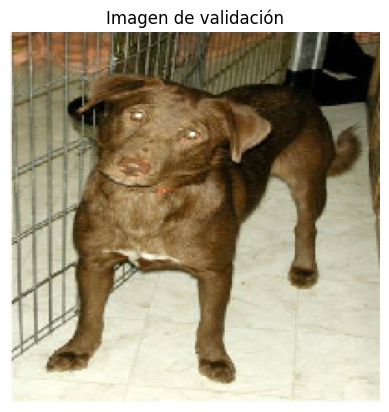

In [20]:
x_batch, y_batch = next(val_data)
index = random.randint(0, len(x_batch) - 1)

image = x_batch[index]
label = y_batch[index]

# Mostrar la imagen
plt.imshow(image)
plt.axis('off')
plt.title("Imagen de validación")
plt.show()

In [21]:
image_expanded = np.expand_dims(image, axis=0)

# Predicción
prediction = model.predict(image_expanded)[0][0]

# Interpretación
predicted_label = "dog 🐶" if prediction > 0.5 else "cat 🐱"
actual_label = "dog 🐶" if label == 1 else "cat 🐱"

print(f"Predicción del modelo: {predicted_label}")
print(f"Etiqueta real: {actual_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Predicción del modelo: dog 🐶
Etiqueta real: dog 🐶


Lo había hecho con todas la fotos y me daba una eficacia de un 98%, pero no podía hacer push por que el dataset era muy grande y lo he dejado en 10 de cada. 